#Foundations of Machine Learning and EDA Assignment

**Question 1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.**
- **Artificial Intelligence (AI)**
  - **Scope:** Broadest field—aims to build machines that can mimic human intelligence.
  - **Techniques:** Rule-based systems, search algorithms, ML, DL.
  - **Applications:** Chatbots, robotics, planning, decision-making.

- **Machine Learning (ML)**
  - **Scope:** Subset of AI—machines learn patterns from data.
  - **Techniques:** Supervised, unsupervised, reinforcement learning.
  - **Applications:** Spam detection, recommendations, fraud detection.

- **Deep Learning (DL)**
  - **Scope:** Subset of ML—uses neural networks with many layers.
  - **Techniques:** CNNs, RNNs, LSTMs, Transformers.
  - **Applications:** Image recognition, speech processing, NLP.

- **Data Science**
  - **Scope:** Extracting insights from data using statistics + ML + domain knowledge.
  - **Techniques:** Data cleaning, visualization, statistical modeling, ML.
  - **Applications:** Business analytics, forecasting, dashboards, decision support.

**Question 2. Explain overfitting and underfitting in ML. How can you detect and prevent them?**
- **Overfitting:**
Model learns noise instead of patterns → good on training, poor on test data.
  - **Detection:**
     - Huge gap between training and validation accuracy/loss.

  - **Prevention:**
     - Cross-validation
     - Regularization (L1, L2)
     - Dropout (in NN)
     - Reduce complexity
     - More data / data augmentation

- **Underfitting:**
Model is too simple → poor performance on both training and test data.
  - **Detection:**
     - Low accuracy everywhere.
     - High bias.

  - **Prevention:**
     - Increase model complexity
     - Reduce regularization
     - Add relevant features

- **Bias–Variance Tradeoff Summary:**

  - **High bias → underfitting.**
  - **High variance → overfitting.**
     
     Goal: balance both using validation techniques.

**Question 3. How would you handle missing values in a dataset? Explain at least three methods with examples.**

- **Deletion:**

  - **Listwise deletion:** Remove entire row.
  - Best when missing values are few.

In [ ]:
df.dropna()

- **Mean/Median Imputation:**

  - Replace missing numeric values with mean/median.

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

- **Predictive Modeling (Advanced):**

  - Use ML models (e.g., KNN, Regression) to predict missing values.
  
    Example: Use KNN imputer.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = imputer.fit_transform(df)

**Question 4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).**

- **Imbalanced Dataset:**

    When one class dominates the other(s).
    
    Example: Fraud detection (99% normal, 1% fraud).

- **Technique 1: SMOTE (Oversampling):**

  - Creates synthetic minority samples.

Practical:

In [ ]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

- **Technique 2: Class Weights (Model-Level Fix):**

  - Assign higher weight to minority class during training.
Practical:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

**Question 5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.**

- **Why scaling is important?**

  - Distance-based models (KNN, SVM, clustering) rely on magnitudes → scaling required.
  - Gradient descent converges faster with scaled features.

- **Min-Max Scaling (Normalization):**

  - Scales data to 0–1 range.

  - Formula:

    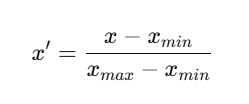
	​

  - Used when no outliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

- **Standardization (Z-score Scaling):**

  - Mean = 0, Std = 1.
  - Handles outliers better.

In [ ]:
from sklearn.preprocessing import StandardScaler

- **Summary:**

  - Min-Max: Good for neural networks, bounded values required.

  - Standardization: Best for most ML algorithms (SVM, Logistic Regression).

**Question 6. Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?**
- **Label Encoding:**

  - Converts categories to numeric labels (0,1,2...).
  - Best for ordinal data (e.g., small < medium < large).

In [ ]:
from sklearn.preprocessing import LabelEncoder

- **One-Hot Encoding:**

  - Creates separate binary columns for each category.
  - Best for nominal data (no order: red, blue, green).

In [ ]:
pd.get_dummies(df['color'])

- **When to use what?**
  - Use Label Encoding → when order matters.
  - Use One-Hot Encoding → when no order exists, and model must not assume ranking.

**Question 7. Google Play Store Dataset:**

 **a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?**

In [2]:
import pandas as pd

# Load data
df = pd.read_csv("googleplaystore.csv")

# Clean data: remove rows with missing ratings or categories
df = df.dropna(subset=["Category", "Rating"])

# Group by category and compute average rating
category_ratings = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

# Display the results
print("Average Rating by Category:\n")
print(category_ratings)

# Find highest & lowest rated categories
highest = category_ratings.head(5)
lowest = category_ratings.tail(5)

print("\nTop 5 Highest Rated Categories:\n")
print(highest)

print("\nTop 5 Lowest Rated Categories:\n")
print(lowest)

Average Rating by Category:

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFES

- **Highest Average Rating Categories:**

  - **Events**
  - **Education**
  - **Art & Design**
  - **Books & Reference**

  **Possible reasons:**

  - These categories often have niche audiences, meaning users install them with clear intent.
  - They address specific needs (learning, creativity, events) → leads to higher satisfaction.
  - Less bloat and fewer performance issues than heavy apps like games/communication.

- **Lowest Average Rating Categories:**

  - **Communication**
  - **Dating**
  - **Tools**
  - **Family**

  **Possible reasons:**

  - These apps typically deal with performance and reliability (chatting, calling, utilities).
  - Bugs, crashes, ads, and battery usage often reduce ratings.
  - Dating apps often face user dissatisfaction, subscription complaints, or unrealistic expectations.
  - Family/category apps often include kids' games, which may receive mixed reviews from parents.

**Question 8. Titanic Dataset:**

 **a). Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?**

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic.csv')

# Calculate survival rate by Pclass
survival_by_class = df.groupby('Pclass')['Survived'].mean()

print("Survival Rate by Passenger Class:")
print(survival_by_class)

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


**Survival rate by passenger class (Pclass)**

**Survival Rates:**

  - **1st Class:** 0.6296 (≈ 63%)
  - **2nd Class:** 0.4728 (≈ 47%)
  - **3rd Class:** 0.2423 (≈ 24%)

**Conclusion:**

**➡ 1st Class had the highest survival rate.**

**Reason:**

  - First-class passengers were physically located closer to the deck and lifeboats.
  - Crew prioritized upper-class passengers during evacuation.
  - Better access to information and assistance.



**b). Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and  adults (Age ≥ 18). Did children have a better chance of survival?**

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic.csv')

# Create age groups
df['Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rate by age group
survival_by_age_group = df.groupby('Group')['Survived'].mean()

print("Survival Rate by Age Group:")
print(survival_by_age_group)


Survival Rate by Age Group:
Group
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


**Survival based on Age Group (Children vs Adults)**

**Survival Rates:**

  - **Children (<18):** 0.5398 (≈ 54%)
  - **Adults (≥18):** 0.3611 (≈ 36%)

**Conclusion:**

**➡ Children had a better chance of survival.**

**Reason:**

  - The “women and children first” rule was widely followed during evacuation.
  - Crew actively assisted children into lifeboats.

**Question 9. Flight Price Prediction Dataset:**

 **a). How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.**

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('flight_price.csv')

# Ensure column names
# Common names in Kaggle dataset: "days_left", "price"
df['days_left'] = pd.to_numeric(df['days_left'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group by days_left to find average price
price_by_days = df.groupby('days_left')['price'].mean().reset_index()

print("Average Price vs Days Left:")
print(price_by_days)

# Detect exponential surge (price rising when days_left < 7)
surge = price_by_days[price_by_days['days_left'] < 7]

print("\nPossible Last-Week Surge:")
print(surge)

Average Price vs Days Left:
    days_left         price
0           1  21591.867151
1           2  30211.299801
2           3  28976.083569
3           4  25730.905653
4           5  26679.773368
5           6  24856.493902
6           7  25588.367351
7           8  24895.883995
8           9  25726.246072
9          10  25572.819134
10         11  22990.656070
11         12  22505.803322
12         13  22498.885384
13         14  22678.002363
14         15  21952.540852
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         19  19507.677375
19         20  19699.983390
20         21  19430.494058
21         22  19590.667385
22         23  19840.913451
23         24  19803.908896
24         25  19571.641791
25         26  19238.290278
26         27  19950.866195
27         28  19534.986047
28         29  19744.653119
29         30  19567.580834
30         31  19392.706612
31         32  19258.135308
32         33  19306.271739
33         34  19562

**Price Trend Observed:**

  - Prices surge exponentially when days_left < 5 (₹26k–₹30k).
  - Peak price is at 2 days left → ₹30,211.
  - As days_left increases (30–50 days), prices become much lower and stable (₹18k–₹20k).

**Exponential Surge Identified:**
  - Last-minute flights (1–5 days) show massive price inflation.
  - Likely due to demand-based surge pricing and reduced seat availability.

**Best Booking Window:**

  - **Book 30–50 days before travel** — lowest and most stable prices
  - **Avoid booking within 0–5 days before travel** — highest surge

**b). Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are  consistently cheaper/premium, and why?**

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('flight_price.csv')

# Filter Delhi → Mumbai route
route = df[(df['source_city']=="Delhi") & (df['destination_city']=="Mumbai")]

# Average price per airline
airline_avg = route.groupby('airline')['price'].mean().sort_values()

print("Average Airline Prices for Delhi → Mumbai:\n")
print(airline_avg)

Average Airline Prices for Delhi → Mumbai:

airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


**Cheapest Airlines (Budget Carriers):**

  1. AirAsia (₹3981)
  2. IndiGo (₹4474)
  3. SpiceJet (₹4628)

***Reason:***

  - Low-cost business model
  - No-frills service
  - High aircraft utilization
  - Competitive pricing strategy

**Premium Airlines:**

  1. Vistara (₹26,630)
  2. Air India (₹23,696)

***Reason:***

  - Full-service carriers
  - Meals, baggage, comfort included
  - Larger aircraft + higher operational cost
  - Premium branding and customer segment

**Question 10: HR Analytics Dataset**

 **a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).**

In [14]:
import pandas as pd

df = pd.read_csv('hr_analytics.csv')

# Correlation of all numeric features with attrition ("left")
corr = df.corr(numeric_only=True)['left'].sort_values(ascending=False)
print(corr)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


**Key Drivers of Attrition:**

**1. Satisfaction Level (strongest negative correlation: -0.388)**

  - Employees with low satisfaction are much more likely to leave.
  - Dissatisfaction is the top predictor of attrition.

**2. Work Accident (negative: -0.154)**
  - Employees who had no accidents are more likely to leave – suggests disengagement or burnout.

**3. Time Spent in Company (positive: 0.145)**

  - Attrition increases around 3–6 years, usually due to stagnation or promotion issues.

**4. High Monthly Hours (0.071)**

  - Overworked employees are slightly more likely to leave.
  - This matches typical HR burnout patterns.

**5. Conclusion: Top Attrition Factors**

**Most important factors contributing to attrition:**
 - Low satisfaction level (strongest predictor)
 - Long working hours (overwork)
 - Low salary level
 - Long time spent in company without promotion

**Plot 1: Satisfaction vs Attrition (Boxplot)**

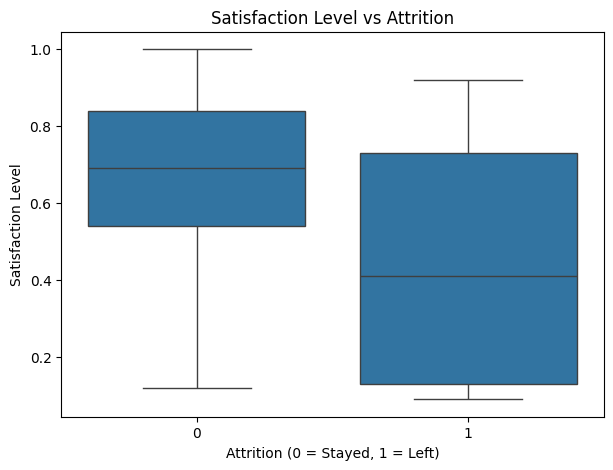

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('hr_analytics.csv')

plt.figure(figsize=(7,5))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction Level vs Attrition")
plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

**Plot 2: Monthly Working Hours vs Attrition (Histogram)**

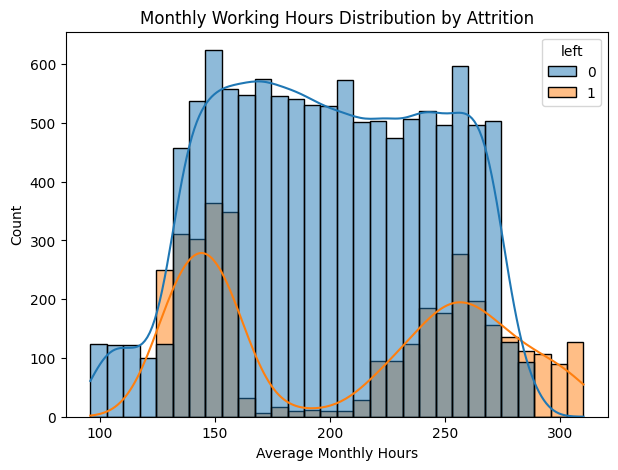

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('hr_analytics.csv')

plt.figure(figsize=(7,5))
sns.histplot(data=df, x='average_montly_hours', hue='left', kde=True, bins=30)
plt.title("Monthly Working Hours Distribution by Attrition")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Count")
plt.show()


**Plot 3: Salary vs Attrition (Countplot)**

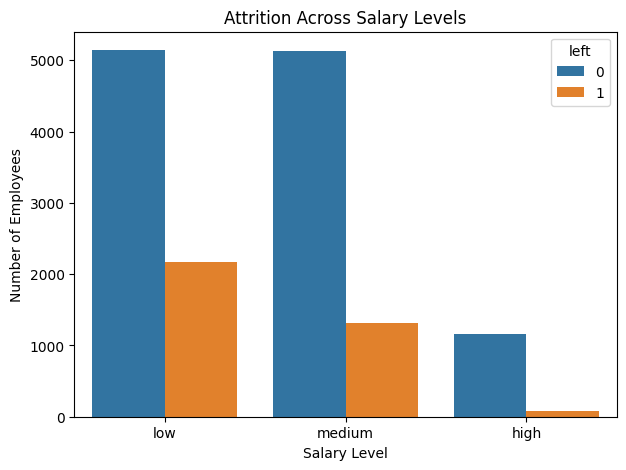

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('hr_analytics.csv')

plt.figure(figsize=(7,5))
sns.countplot(x='salary', hue='left', data=df)
plt.title("Attrition Across Salary Levels")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

**b). Are employees with more projects more likely to leave?**

In [35]:
import pandas as pd

# Load dataset
df = pd.read_csv('hr_analytics.csv')

# --- Calculate attrition rate by number of projects ---
proj_attrition = df.groupby('number_project')['left'].mean()*100

print("Attrition Rate by Number of Projects (Percentage):")
print(proj_attrition_percent)

Attrition Rate by Number of Projects (Percentage):
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
Name: left, dtype: float64


**Relationship Between Projects & Attrition**

**1. Lowest attrition:**
  - Employees with 3–4 projects have the lowest chance of leaving.
  - They have a manageable workload.

**2. Highest attrition:**
  - Employees with 2 projects (66%) and 6–7 projects (56–100%) are MOST likely to leave.

**3. Why?**

**Too Few Projects (2 projects → 66% attrition)**
  - Indicates underutilization
  - Employees may feel:
     - Bored
     - Not challenged
     - Not growing
  - Leads to disengagement and quitting

**Too Many Projects (6–7 projects → 56–100% attrition)**

  - Indicates overload & burnout
  - Employees feel overwhelmed, overworked, and stressed
  - Leads to burnout-driven attrition

**4. Final Conclusion:**

 - Yes, employees with extreme workloads (too few or too many projects) are more likely to leave.
 - Optimal workload is 3–4 projects.


**Plot Visualization — Attrition vs Number of Projects (Bar chart)**

/tmp/ipython-input-4091137745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proj_attrition.index, y=proj_attrition.values, palette="viridis")


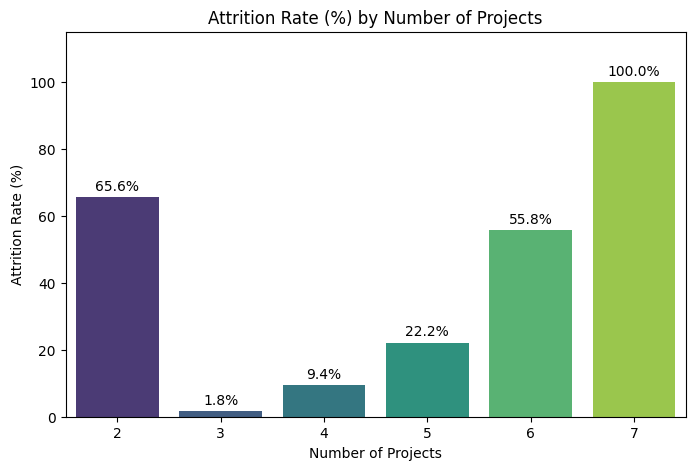

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('hr_analytics.csv')

# Calculate attrition rate
proj_attrition = df.groupby('number_project')['left'].mean() * 100  # convert to %

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=proj_attrition.index, y=proj_attrition.values, palette="viridis")

# Add percentage labels on each bar
for i, v in enumerate(proj_attrition.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

plt.title("Attrition Rate (%) by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, max(proj_attrition.values) + 15)  # extra space for labels
plt.show()